In [1]:
import pandas as pd

data_path = "results/table_test_latest.csv"
data = pd.read_csv(data_path)

data.head()

,nH,d,red_chi_squared,gamma,power_norm_fake,power_norm_fit,temp,disk_norm_fake,disk_norm_fit,abs_l1_error_disk_norm,frac_uncert,med_frac_uncert
0,0.5,8.13,0.959766,1.701542,0.097541,0.143463,0.691128,553.033000,595.389828,42.356828,0.076590,0.214909
1,1.0,8.13,0.981193,1.700659,0.097541,0.145796,0.690516,553.033000,588.479295,35.446295,0.064094,0.228969
2,5.0,8.13,0.933018,1.701871,0.097541,0.155760,0.695113,553.033000,574.208143,21.175143,0.038289,0.317041
3,10.0,8.13,0.924737,1.718436,0.097541,0.148493,0.695159,553.033000,556.391483,3.358483,0.006073,0.456014
4,0.5,2.00,0.952528,1.700006,1.611783,1.571758,0.704421,9138.441724,9203.148651,64.706926,0.007081,0.033661


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'frac_uncert' might be NaN to avoid issues in plotting
data_clean = data.dropna(subset=['frac_uncert'])
data_clean = data[data['frac_uncert']<100]

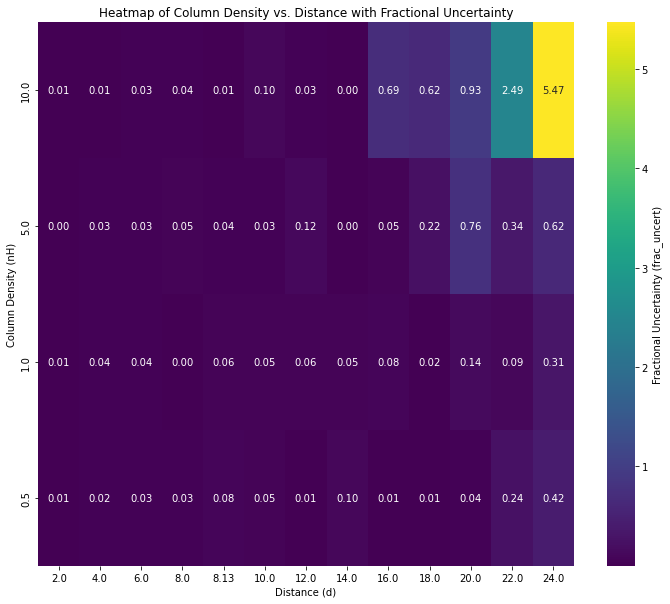

In [3]:
import seaborn as sns

# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='frac_uncert', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Fractional Uncertainty (frac_uncert)'})
heatmap.set_title('Heatmap of Column Density vs. Distance with Fractional Uncertainty')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()


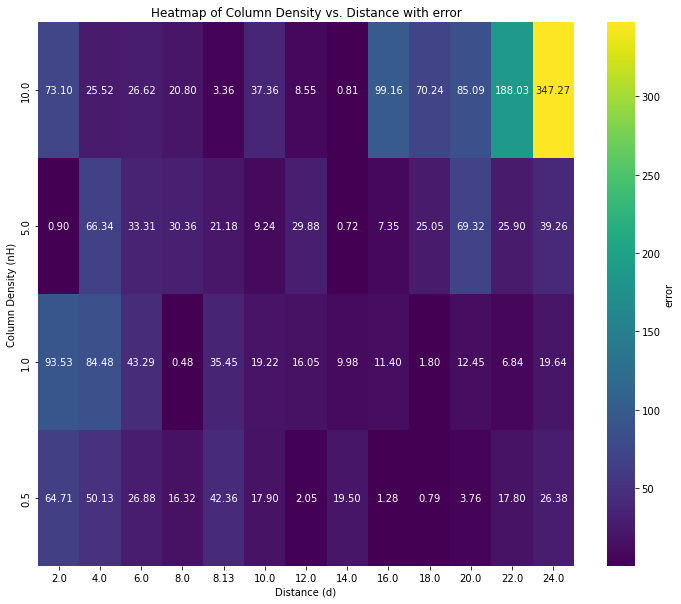

In [4]:
# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='abs_l1_error_disk_norm', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'error'})
heatmap.set_title('Heatmap of Column Density vs. Distance with error')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()
